## NumPy Tutorial
### Einführung

 
<br><br> 
<img width=600 src="images/matrix.png" />

 NumPy ist eine Abkürzung für Numerical Python. Es handelt sich um ein sehr verbreitetes Modul für Python, welches besonders für den Umgang mit grossen Zahlenmengen geschrieben wurde, deshalb ist es speziell in Anwendungen der Künstlichen Intelligenz und Big Data nicht mehr wegzudenken. Es ist kostenlos, wie Python selbst und alle seine importierbaren Module. Ein Download ist auf der Webseite http://www.numpy.org möglich. Damit NumPy seinem Ziel, grosse Zahlenmengen schnell und Speicher-schonend verarbeiten zu können,  gerecht werden kann, ist es überwiegend in der Programmiersprache C geschrieben, die diese Vorteile bietet (aber auch viele Nachteile im Vergleich zu Python: schwerer erlernbar, weniger interaktiv nutzbar, weniger intuitive Syntax...). Definieren wir "Kernpython" als die Python Umgebung, die von https://www.python.org/ downgeloaded werden kann und keine externen Module enthält, sind die Unterschiede vor allem Folgende:

- Integer (Ganzzahlen) und Floats (Fliesskommazahlen) sind im <span style ="color:red"> Kernpython </span> sehr komfortabel implementiert. Eine vor der Benutzung im Programm erfolgende Festlegung auf bestimmte Grössenbereiche ist nicht erforderlich. 
- Um die Vorteile von <span style ="color:blue"> NumPy </span> nutzen zu können, enthält dieses im Gegensatz dazu vordefinierte Typen mit bestimmter Grössenbegrenzung für die numerischen Werte, wie z.B. Int32 (Integer zwischen -2,147,483,648 bis +2,147,483,647).

- Listen sind im <span style ="color:red"> Kernpython </span> die wichtigsten kombinierten Datentypen, sie stellen <em> Allzweckcontainer </em> dar, die alle im Python benutzen Datentypen als Elemente enthalten können.
- <span style ="color:blue"> NumPy </span> basiert dagegen auf Arrays oder Feldern, deren Elemente <em>möglichst von einem gleichförmigen Typ</em> sein sollen, damit man über einen numerischen Index, der die Position des Elements beschreibt, schnell darauf zugreifen kann.

- Im <span style ="color:red"> Kernpython </span> kann man über die Elemente eines kombinierten Datentyps iterieren, kann sie also der Reihe nach abrufen und einzeln verarbeiten, dies geschieht explizit über Konstruktionen wie Schleifen.
- <span style ="color:blue"> NumPy </span> verarbeitet die Arrays als Gesamtes, man kann also z.B. ganze Felder miteinander verknüpfen ohne explizit einen Zugang zu den einzelnen Elementen zu benötigen.





Neben NumPy sind auch die Module SciPy (für weitere wissenschaftliche Funktionen wie fortgeschrittene numerische Analyse, Fourieranalyse...), Pandas (für den Umgang mit tabellarischen Daten) und Matplotlib (für die graphische Ausgabe von Ergebnissen) wesentliche Ergänzungen zum Kernpython im wissenschaftlichen Umfeld. Sie erweitern und ersetzen die Funktionalität von Matlab, aber in einer wesentlich konsistenteren und universelleren Programmierumgebung und kostenfrei.<br><br>
<img width = 700 src="Images/Numpy_Pandas_etc.png" />

Bauen wir nun ein NumPy Array auf. Zunächst importieren wir NumPy mit dem üblichen Alias np, dann erzeugen wir ein Array mit dem Namen "example". Der Typ des Arrays ist: numpy.array. Wir haben die Liste [1,2,3,4,5] in das Array umgewandelt.

In [1]:
import numpy as np
example = np.array([1,2,3,4,5])
print(f" der Inhalt ist: {example}")
print(f" der Typ ist: {type(example)}")

 der Inhalt ist: [1 2 3 4 5]
 der Typ ist: <class 'numpy.ndarray'>


Wir können nun direkt über alle Elemente des Arrays Umformungen durchführen ohne Schleifen benutzen zu müssen, wie im Kernpython. Man beachte den Unterschied in der Darstellung der Ergebnisse, <b>np.arrays werden ohne Kommaseparierung angezeigt.

In [3]:
# NumPy
example_neu = example * 20
print(example_neu)

# Kernpython
l = [1,2,3,4,5]
l_neu = []
for elem in l:
    l_neu.append(elem*20)
print(l_neu)

# Kernpython mit Listenabstraktion
print([x * 20 for x in range(1,6)])

[ 20  40  60  80 100]
[20, 40, 60, 80, 100]
[20, 40, 60, 80, 100]


Nun zu den Laufzeiten solcher Operationen und dem Speicherbedarf. Zunächst erzeugen wir uns eine Integer-Liste und eine Float-Liste, um die Tests durchzuführen.

In [13]:
import random
l_int = list(range(50)) #50 Integer
print(l_int.__sizeof__())

l_float = [float(random.randint (-10,10))   for _ in range(50)] #50 Floats

import matplotlib.pyplot as plt

print(str(l_int[:5])[:-1]+"..."+"49]")

print(str(l_float[:5])[:-1]+"...]")


440
[0, 1, 2, 3, 4...49]
[-7.0, -6.0, 3.0, 3.0, -6.0...]


Um den Speicherbedarf zu prüfen, können wir aus dem Modul sys die Methode ``` liste.__sizeof__()``` benutzen. Diese zeigt uns den jeweiligen Speicherbedarf des zu prüfenden Objekts an. Die Angabe bezieht sich bei unseren Listen im Kernpython dann aber nur auf das Listenobjekt selbst. Die Elemente müssen mit ihrem zusätzlichen Speicherbedarf dazu addiert werden. Listen sind ja bekanntlich so aufgebaut: <br><br>
<img width=600 src="Images/Speichern_von_Listen.png" />
<br><br>
In NumPy stellt sich die Situation so dar:<br><br>
<img width=600 src="Images/SpeichernArrays.png" /><br><br>
Wir erzeugen eine wachsende Integerliste, Floatliste, Stringliste und eine Liste mit variablen Elementen (integer,float und bool), die wir dann auch in np.arrays verwandeln, und sehen uns dann den Speicherbedarf an. 

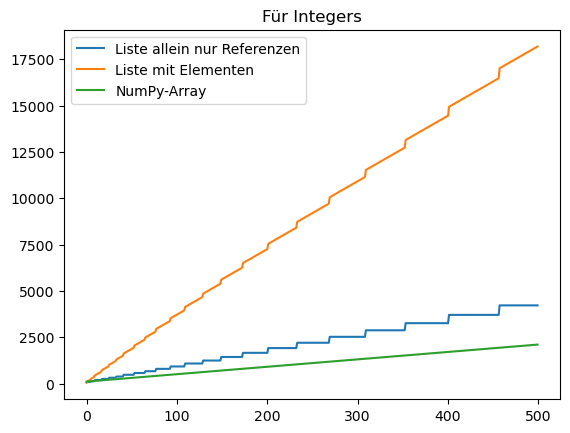

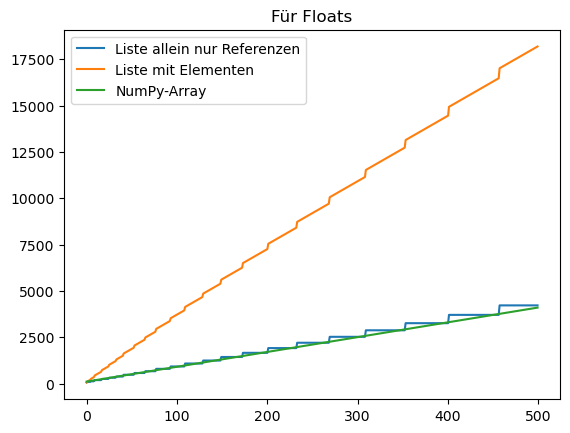

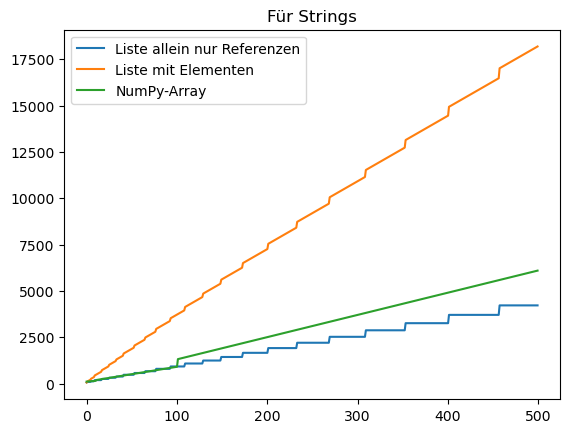

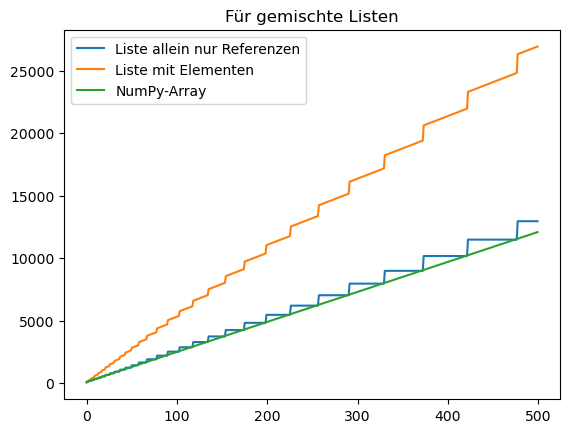

In [24]:

import matplotlib.pyplot as plt
from sys import getsizeof as gs
titles = ["Für Integers","Für Floats","Für Strings","Für gemischte Listen"]

for _ in range(4):
    l=[]
    ergeb = []
    ergeb1 = []
    ergebnp = []
    for i in range(500):

        ergeb.append(gs(l))
        ergeb1.append(gs(l) + i*28)
        if _ != 3:
            ergebnp.append(gs(np.array(l)))
        else:
            ergebnp.append(gs(np.array(l,dtype=object)))
            
        if _ == 0:
            l.append(i)
        elif _== 1:
            l.append(float(i))
        elif _ == 2:
            l.append(str(i))
        else:
            l.extend([str(i)*20,float(i),bool(i)])
        
    plt.title(titles[_])
    plt.plot(ergeb)
    plt.plot(ergeb1)
    plt.plot(ergebnp)
    plt.legend(["Liste allein nur Referenzen","Liste mit Elementen","NumPy-Array"])
    plt.show()



Wir sehen, dass der Speicherbedarf von NumPy-Arrays für Integers noch unter dem für die Listenobjekte ohne deren Elemente liegt.
Die Schere klafft für mehr Listeneinträge natürlich immer weiter auf.
Für Floats entspricht der NumPy Speicherbedarf des kompletten Arrays dem der Referenzen der Python-Liste allein, die Inhalte der Liste sind dabei gar nicht berücksichtigt! Für Strings nimmt NumPys Vorteil etwas ab. Für gemischte Listen mit Strings, Floats und Bools noch etwas mehr. NumPy heisst also nicht umsonst "Numeric Python". 

Ein weiterer wesentlicher Vorteil von NumPy gegenüber dem Kernpython ist die Ausführungsgewschwindigkeit.
<b>Wir vergleichen jetzt die elementweise Addition der Elemente von 2 (identischen) NumPy- Arrays und 2 (identischen) Python - Listen mit 1000 Elementen.</b> Es wird bei beiden kombinierten Datentypen jeweils das Element mit dem gleichen Index addiert.
Dazu verwenden wir das Modul ```timeit```. Dieses Modul erlaubt uns Programmabschnitte mit vielen Wiederholungen ablaufen zu lassen und den Zeitbedarf dafür zu messen. Wir bauen hierzu ein Timer- Objekt auf, dieses Objekt hat in unserem Fall zwei Attribute, einmal den zu messenden Programmabschnitt als Statement und dazu einen Setup- Teil. Man kann dann mit der timeit Methode diesen Programmabschnitt wiederholt durchlaufen mit einer als Attribut eingegebenen Anzahl von Durchläufen (hier ebenfalls 1000, um zufällige Schwankungen zu mitteln).

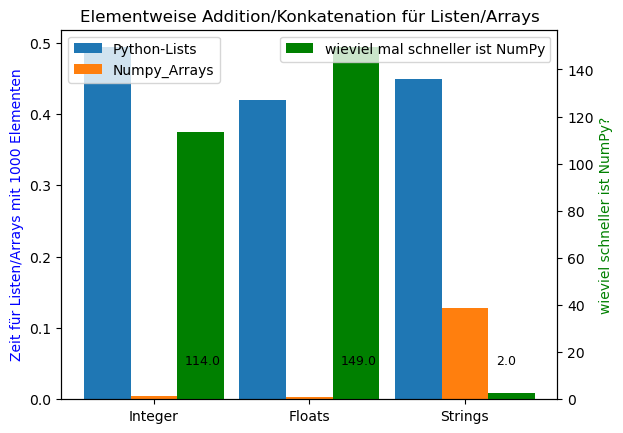

In [26]:
import numpy as np
from timeit import Timer
import matplotlib.pyplot as plt

def python_lists():    
    ergeb_list=[]
    for i in range(len(l)):
        ergeb_list.append(l[i] + l[i])
    
def numpy_arrays():    
    ergeb_array = a + a 
    

def make_lists_and_arrays(n):
    l_int = [x for x in range(n)]
    a_int = np.array(l_int)
    l_float = [float(x) for x in range(n)]
    a_float = np.array(l_float)
    l_str = ["abcdefg" for x in range(n)]
    a_str = np.array(l_str,dtype=object)
    return [l_int,a_int,l_float,a_float,l_str,a_str]

elem_nr = 1000
to_plot_py,to_plot_np = [],[]
to_test = make_lists_and_arrays(elem_nr)

for the_list in to_test[::2]: 
    l = the_list    
    timer_obj1 = Timer("python_lists()", 
                   "from __main__ import python_lists")
    to_plot_py.append(timer_obj1.timeit(1000))
  
for the_array in to_test[1::2]: 
    a = the_array
    timer_obj1 = Timer("numpy_arrays()", 
                   "from __main__ import numpy_arrays")
    to_plot_np.append(timer_obj1.timeit(1000))


X = ['Integer','Floats','Strings']
y1 = np.array(to_plot_py)
y2 = np.array(to_plot_np)
z =y1/y2
  
X_axis = np.arange(len(X))
fig, ax = plt.subplots()
rects1 = ax.bar(X_axis - 0.3, y1, 0.3, label = 'Python-Lists')
rects2 = ax.bar(X_axis , y2, 0.3, label = 'Numpy_Arrays')
ax2 = ax.twinx()
rects3 = ax2.bar(X_axis + 0.3 , y1/y2-1, 0.3, label = "wieviel mal schneller ist NumPy", color = "green")

  
# plt.bar(X_axis - 0.2, y1, 0.2, label = 'Python-Lists')
# plt.bar(X_axis + 0.2, y2, 0.2, label = 'Numpy_Arrays')
# plt.bar(X_axis , y1 * 2, 0.2, label = "Verhältnis Listen/Arrays")  

plt.xticks(X_axis, X)
ax.set_ylabel("Zeit für Listen/Arrays mit 1000 Elementen", color='b')
ax2.set_ylabel('wieviel schneller ist NumPy?', color='g')
for index in range(3):
    plt.text(index+.2,15, str( round(y1[index]/y2[index]-1,0)), fontsize=9)


plt.xlabel("Typen")
plt.title("Elementweise Addition/Konkatenation für Listen/Arrays")
ax.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.show()

Wie wir sehen können, ist NumPy bei Zahlen viel schneller, bei Strings immer noch um den Faktor 2. Wir sparen also speziell bei numerischen Berechnungen mit NumPy eine Menge Zeit und Speicherbedarf. Wir werden nun sehen, was man alles mit NumPy - Arrays machen kann und wie sie in mehreren Dimensionen aufgebaut werden können.